In [1]:
import numpy as np
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties.umath import log as uln
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
def f(x, a, b, c):
    y = a*np.log(c + b*x)
    #y = a*x + b
    return y

def f_est(x, a, b):
    y = a*np.log(1 + b*x)
    return y
    

In [71]:
colnames=['Time', 'AccelRadius'] 
wirz_df = pd.read_csv('wirz-time_dependent_fig11.csv', names=colnames, header=None)
wirz_df['AccelRadius'] = wirz_df['AccelRadius'] / 2


In [72]:
wirz_df

,Time,AccelRadius
0,0.147783,0.592915
1,0.467980,0.606298
2,1.428571,0.638765
3,2.610837,0.638529
4,3.423645,0.651421
5,4.704433,0.655646
6,6.428571,0.662848
7,8.128079,0.688386
8,9.482759,0.690877
9,10.443350,0.685187


<Axes: xlabel='Time'>

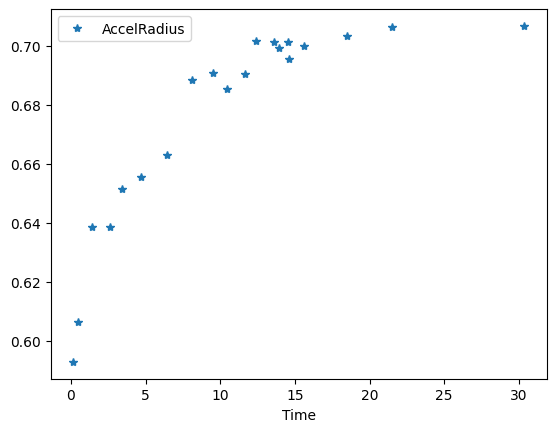

In [73]:
wirz_df.plot('Time', 'AccelRadius', marker='*', linewidth=0)

In [74]:
X = wirz_df['Time'].to_numpy()
#x = np.array([1, 2, 3])
#y = np.array([2, 4, 6])
y = wirz_df['AccelRadius'].to_numpy()
print(y)

[0.592915   0.60629775 0.63876515 0.6385291  0.6514212  0.65564598
 0.6628484  0.68838556 0.69087669 0.6851875  0.69040263 0.70155936
 0.70132356 0.69909704 0.70108506 0.69538733 0.69985744 0.70335429
 0.70635732 0.70669297]


[3.09184503e-02 4.11959711e+08 1.48336984e+08]


/var/folders/_h/4k_bpbys2pzg9471b86bck0h0000gn/T/ipykernel_84002/1922209349.py:7: RuntimeWarning: invalid value encountered in log
  y = a*np.log(1 + b*x)


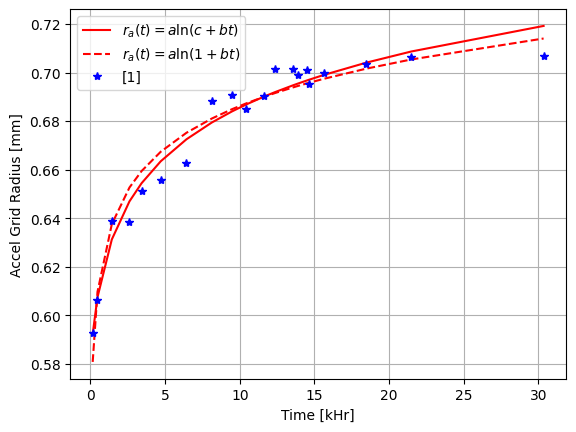

In [80]:
popt, pcov = curve_fit(f, X, y)
popt_est, pcov_Est = curve_fit(f_est, X, y)
print(popt)
plt.plot(X, f(X, popt[0], popt[1], popt[2]), 'r-', label =r"$r_a(t) = a\ln(c+bt)$")
plt.plot(X, f_est(X, popt_est[0], popt_est[1]), 'r--', label =r"$r_a(t) = a\ln(1+bt)$")
plt.plot(X, y, 'b*', label='[1]')
plt.xlabel('Time [kHr]')
plt.ylabel('Accel Grid Radius [mm]')
plt.grid(which='both')
plt.legend()


Text(0.5, 0, 'Time [khr]')

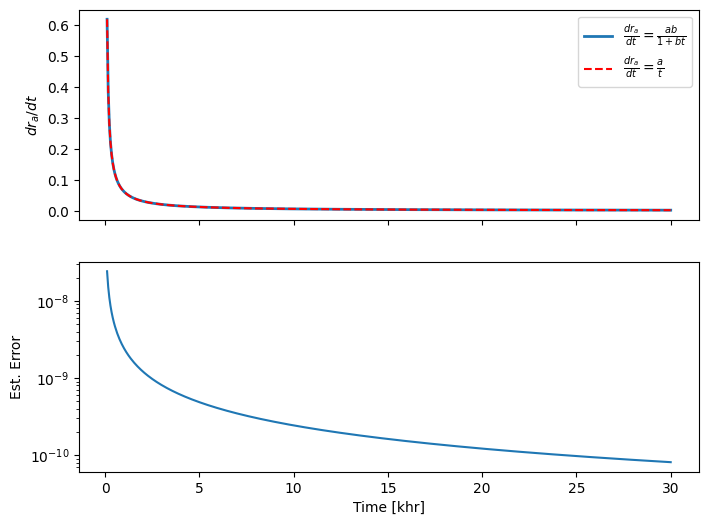

In [58]:
a = popt[0]
b = popt[1]
t = np.linspace(0.1,30, 500)
dra_dt = a*b/(1+b*t)
dra_dt_est = a/t
fig, axs = plt.subplots(2, 1, figsize = (8, 6),sharex=True)

axs[0].plot(t, dra_dt, linewidth = 2,label=r'$\frac{dr_a}{dt} = \frac{ab}{1+bt}$')
axs[0].plot(t, dra_dt_est, 'r--', label=r"$\frac{dr_a}{dt} = \frac{a}{t}$")
axs[1].semilogy(t, abs((dra_dt - dra_dt_est)/dra_dt))

axs[0].legend()
axs[0].set_ylabel(r'$dr_a/dt$')

axs[1].set_ylabel(r'Est. Error')
axs[1].set_xlabel(r'Time [khr]')


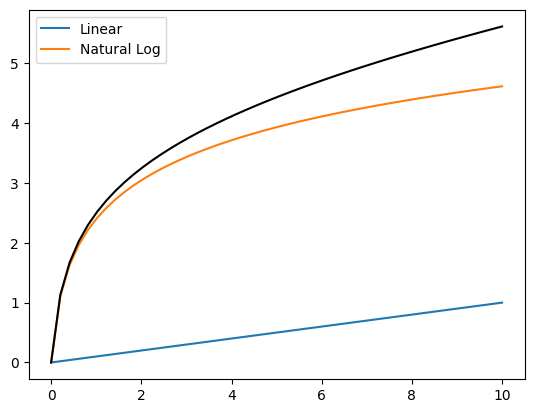

In [86]:
x = np.linspace(0, 10)
y1 = x/10 
y2 = np.log(1+10*x)
plt.plot(x, y1, label = 'Linear')
plt.plot(x, y2, label = 'Natural Log')
plt.plot(x, y1+y2, 'k')
plt.legend()